# Project 4
Marcus Twichel

## Data Summary
This project aims to find the most excellent rated red wines from the UCI repositories "Wine Quality" dataset (P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.). The dataset contains samples from 1,599 wines, and each sample has 11 numerical attributes describing various characteristics of the wine. These include citric acid levels, density, pH, alcohol percentage, and more. It then gives a quality score of 3-8, with 8 being the highest quality. There are no missing values.

My aim will be to predict the quality of the wines and try to find the exceptionally good wines, which for my purposes means they score a 7 or 8. I will use classification to try and predict this.

## Setup and Exploration
I first began importing my data and looking a few rows for context of the data.

In [5]:
import pandas as pd

In [18]:
raw_data = pd.read_csv('~/Downloads/winequality-red.csv')
D = raw_data.loc[:, raw_data.columns != 'quality']
D.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [19]:
D.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


It appears some columns much lower standard deviations than others, so it may be those columns are not as good predictors as the others. Next I will look at the distribution of my classes.

In [24]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Wine Quality Distribution')

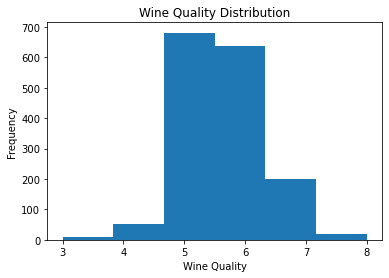

In [28]:
classes = raw_data['quality']
plt.hist(classes, bins=6)
plt.xlabel('Wine Quality')
plt.ylabel('Frequency')
plt.title('Wine Quality Distribution')

It appears that the vast majority of wines have a quality of 5, 6, and there are a few outliers that are especially bad or especially good.

I would also like to visuallize the data to see if there is clear seperation in the data. However, since there are so many attributes, I'm going to use PCA to reduce the dimensionality to 2 so I can plot it visually.

In [29]:
from sklearn.decomposition import PCA

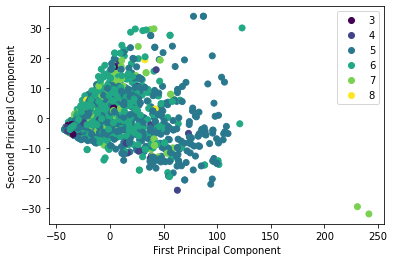

In [40]:
twoDimensionData = PCA(n_components=2).fit_transform(D)
scatter = plt.scatter(twoDimensionData[:, 0], twoDimensionData[:, 1], c=classes)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend(handles=scatter.legend_elements()[0], labels=[3,4,5,6,7,8])


Unfortunately, there doesn't appear to be any seperation yet.

## Preprocessing
I will start preprocessing the data by applying standard normalization. I believe this will help because there are a few columns with a relativly small standard deviation and thus low variance. Since they have low variance, they proably can't contribute much to predicting quality.

In [41]:
normalized_D = (D - D.mean()) / D.std()
normalized_D.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,-1.570643e-14,-1.590973e-15,6.045057e-15,-1.344696e-15,5.093591e-15,-7.724347e-17,1.619856e-16,4.946064e-13,-5.937923e-15,-2.175036e-15,2.580411e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.136377e+00,-2.277567e+00,-1.391037e+00,-1.162333e+00,-1.603443e+00,-1.422055e+00,-1.230199e+00,-3.537625e+00,-3.699244e+00,-1.935902e+00,-1.898325e+00
25%,-7.004996e-01,-7.696903e-01,-9.290275e-01,-4.530767e-01,-3.711129e-01,-8.484502e-01,-7.438076e-01,-6.075656e-01,-6.549356e-01,-6.380200e-01,-8.661079e-01
50%,-2.410190e-01,-4.367545e-02,-5.634264e-02,-2.402999e-01,-1.798892e-01,-1.792441e-01,-2.574163e-01,1.759533e-03,-7.210449e-03,-2.250577e-01,-2.092427e-01
75%,5.056370e-01,6.264921e-01,7.650078e-01,4.340257e-02,5.382858e-02,4.899619e-01,4.721707e-01,5.766445e-01,5.757422e-01,4.238832e-01,6.352984e-01
max,4.353787e+00,5.876138e+00,3.742403e+00,9.192806e+00,1.112355e+01,5.365606e+00,7.372847e+00,3.678904e+00,4.526866e+00,7.916200e+00,4.201138e+00


I'll then plot the normalized data to see if it is easier to seperate the high quality wines.

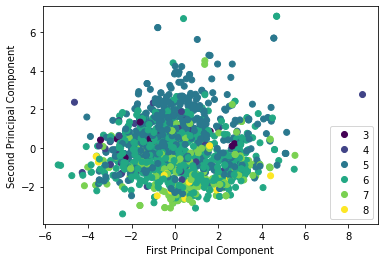

In [42]:
twoDimensionData = PCA(n_components=2).fit_transform(normalized_D)
scatter = plt.scatter(twoDimensionData[:, 0], twoDimensionData[:, 1], c=classes)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend(handles=scatter.legend_elements()[0], labels=[3,4,5,6,7,8])

Already we can start to see 7s and 8s in the lower half of the blob, but it's definetly not separated.

Next I'll look at all the different numbers possible for principle components and graph their total explained variance. This will help us determine how much we should reduce the dimensionality.

[0.28173931278817277, 0.4568220118429404, 0.5977805108224622, 0.7080743772386735, 0.7952827473610351, 0.8552471350764363, 0.9083190640939516, 0.9467696731537685, 0.9781007746827459, 0.994585608007101]


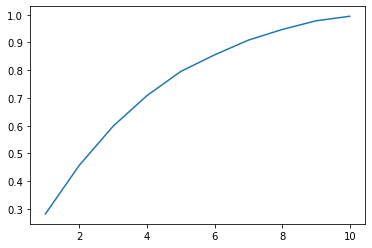

In [182]:
ans = []
for i in range(1,11):
  pca = PCA(n_components=i)
  pca_data = pca.fit_transform(normalized_D)
  ans.append(pca.explained_variance_ratio_.sum())

plt.plot(range(1,11), ans)
print(ans)

Given this graph, I would say we should try 7-10 principle components, as well as not doing PCA at all.

## Classification
Now that we have our data normalized and reduced in dimension, I'll move onto the main topic - predicting quality wines. To do this, I'll use Naieve Bayes classification. I know this is a simple yet powerful technique, and I hope it can help us find what we need.

I'll start by using PCA to reduce the data to 7 components, then applying the classification algorithm.

In [185]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

sevenDimensionData = PCA(n_components=7).fit_transform(normalized_D)


X_train, X_test, y_train, y_test = train_test_split(
    sevenDimensionData, classes, test_size=0.25)
Naive_Bayes = GaussianNB()

Naive_Bayes.fit(X_train, y_train)
prediction_results = Naive_Bayes.predict(X_test)

accuracy_score(y_test, prediction_results)

0.5425

This model so far is not very good. It only has an accuracy slightly above 50%, so it only predicts the correct quality about half the time.

However, our goal isn't to predict exactly the quality of the wines, but whether they're 7's or 8's; for this task, I don't care if the algorithm predicts a 3 as a 4 for example. So, I'm going to transform the classes to be a boolean decider and we'll see how the algorith does.

In [187]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

sevenDimensionData = PCA(n_components=7).fit_transform(normalized_D)

boolean_classes = np.logical_or((classes == 7), (classes == 8))

X_train, X_test, y_train, y_test = train_test_split(
    sevenDimensionData, boolean_classes, test_size=0.25)
Naive_Bayes = GaussianNB()

Naive_Bayes.fit(X_train, y_train)
prediction_results = Naive_Bayes.predict(X_test)

accuracy_score(y_test, prediction_results)


0.8875

As you can see, it greatly improved the accuracy. Roughly 88% of the time, the classifier can detect if a wine is high quality.

Next, I'm going to try this technique with other numbers of principle components and see if that improves our accuracy.

In [204]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

boolean_classes = np.logical_or((classes == 7), (classes == 8))

for i in range (7, 11):
  pcaData = PCA(n_components=i).fit_transform(normalized_D)

  X_train, X_test, y_train, y_test = train_test_split(
      pcaData, boolean_classes, test_size=0.25)
  Naive_Bayes = GaussianNB()

  Naive_Bayes.fit(X_train, y_train)
  prediction_results = Naive_Bayes.predict(X_test)

  print (str(i) + ": " + str(accuracy_score(y_test, prediction_results)))

X_train, X_test, y_train, y_test = train_test_split(normalized_D, boolean_classes, test_size=0.25)
Naive_Bayes = GaussianNB()

Naive_Bayes.fit(X_train, y_train)
prediction_results = Naive_Bayes.predict(X_test)

print("11: " + str(accuracy_score(y_test, prediction_results)))


7: 0.9
8: 0.87
9: 0.8725
10: 0.875
11: 0.8325


After running this a number of times, it looks like our choice of 7 principle components was a good one - it almost always produced a high accuracy number.

Finally, after our reflecting more on our end goal, it becomes clear that accuracy may not be the best way to measure the classifier's success. Our goal is to find which wines are high quality; if we have a few wines we classify as good that actually aren't (False Positives), they will probably get filtered out by sommelier. However, if we pass on a wine because it is classifed as bad (False Negatives), then we will miss out on that wine forever. So, the measure we should most look at is the recall of the True value, which essentially tells us how often we correctly identified a good wine as such. I will write a small helper function to help me determine the recall for true values, then test all the potential priciple components numbers.

In [228]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Returns the recall for only true values
def goodWineRecall(truth, pred):
  matrix = confusion_matrix(truth, pred, labels=[False, True])
  recall = matrix[1, 1] / (matrix[1, 1] + matrix[1, 0])
  return recall


In [233]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

boolean_classes = np.logical_or((classes == 7), (classes == 8))

for i in range(7, 11):
  pcaData = PCA(n_components=i).fit_transform(normalized_D)

  X_train, X_test, y_train, y_test = train_test_split(
      pcaData, boolean_classes, test_size=0.25)
  Naive_Bayes = GaussianNB()

  Naive_Bayes.fit(X_train, y_train)
  prediction_results = Naive_Bayes.predict(X_test)

  print(str(i) + ": " + str(goodWineRecall(y_test, prediction_results)))

X_train, X_test, y_train, y_test = train_test_split(
    normalized_D, boolean_classes, test_size=0.25)
Naive_Bayes = GaussianNB()

Naive_Bayes.fit(X_train, y_train)
prediction_results = Naive_Bayes.predict(X_test)

print("11: " + str(goodWineRecall(y_test, prediction_results)))


7: 0.28846153846153844
8: 0.45098039215686275
9: 0.3090909090909091
10: 0.42857142857142855
11: 0.7924528301886793


As we can see, the recall numbers are not quite as impressive as the accuracy. However, if we use all 11 columns of normalized data, we can recall 80% of high quality wines.

Overall, I think this experiment was moderately successful, but I think there are a number of other avenues I would like to explore. The one that immediately comes to mind is applying other classification algorithms such as logistic regression or a neural network. Another promising idea is using DBSCAN to find outliers in the dataset, then using a simple classifier to decide between exceptionally poor wines and exceptionally good wines.

## Works Cited
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.